In [1]:
# 線形代数
import numpy as np

# データ処理、CSVファイルの読み込み（例：pd.read_csv）
import pandas as pd

# プロット描画
import matplotlib.pyplot as plt

# 可視化ツール
import seaborn as sns

# 学習データとテストデータに分割する
from sklearn.model_selection import train_test_split

# 線形回帰
from sklearn.linear_model import LinearRegression

# 二乗平均平方根誤差
from sklearn.metrics import mean_squared_error

# 標準化
from sklearn.preprocessing import StandardScaler

# 主成分分析
from sklearn.decomposition import PCA

# 線形回帰
from sklearn.linear_model import LinearRegression

# 二乗平均平方根誤差、平均絶対誤差、決定係数
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 標準化
from sklearn.preprocessing import StandardScaler


In [2]:
df_train = pd.read_csv(r"./train.csv")
df_no_na = df_train.dropna()
df = df_no_na[df_no_na['Expected'] <= 1700]
# List of column names to be deleted
columns_to_delete = ['Id', 'Ref_5x5_10th', 'Ref_5x5_50th', 'Ref_5x5_90th', 'RefComposite', 'RefComposite_5x5_10th', 'RefComposite_5x5_50th', 'RefComposite_5x5_90th']

# Delete the columns from the dataframe
df = df.drop(columns=columns_to_delete)

In [3]:
# # 相関行列を計算する
# corr = df.corr()

# corr = corr.drop("Expected")
# # 目的変数と相関の最も高い変数を取得する
# highest_corr_var = corr["Expected"].idxmax()

# highest_corr_var

In [4]:
# # 削除するカラムを取得する
# drop_cols = df.columns.difference(["radardist_km", "Expected"])

# # 削除するカラムを削除する
# df = df.drop(columns=drop_cols)

In [5]:
# # 目的変数を設定します。
# y = df['Expected']
# X = df.drop('Expected', axis=1)

# # 主成分分析の結果を使用して訓練データとテストデータを分割します。
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # データの正規化/標準化
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # モデルのインスタンスを作成し、訓練データにフィットさせます。
# model = LinearRegression()
# model.fit(X_train_scaled, y_train)

# # 訓練データとテストデータに対する予測を行います。
# train_predictions = model.predict(X_train_scaled)
# test_predictions = model.predict(X_test_scaled)

# # MSEを計算します。
# train_mse = mean_squared_error(y_train, train_predictions)
# test_mse = mean_squared_error(y_test, test_predictions)

# # MAEを計算します。
# train_mae = mean_absolute_error(y_train, train_predictions)
# test_mae = mean_absolute_error(y_test, test_predictions)

# # R^2 scoreを計算します。
# train_r2 = r2_score(y_train, train_predictions)
# test_r2 = r2_score(y_test, test_predictions)

# # 結果を表示します。
# print(f'Training MSE: {train_mse}')
# print(f'Test MSE: {test_mse}')
# print(f'Training MAE: {train_mae}')
# print(f'Test MAE: {test_mae}')
# print(f'Training R^2 Score: {train_r2}')
# print(f'Test R^2 Score: {test_r2}')


In [6]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from sklearn.preprocessing import StandardScaler

# # 目的変数を設定します。
# y = df['Expected']
# X = df.drop('Expected', axis=1)

# # 主成分分析の結果を使用して訓練データとテストデータを分割します。
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # データの正規化/標準化
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # モデルのインスタンスを作成し、訓練データにフィットさせます。
# model = LinearRegression()
# model.fit(X_train_scaled, y_train)

# # 訓練データとテストデータに対する予測を行います。
# train_predictions = model.predict(X_train_scaled)
# test_predictions = model.predict(X_test_scaled)

# # MSEを計算します。
# train_mse = mean_squared_error(y_train, train_predictions)
# test_mse = mean_squared_error(y_test, test_predictions)

# # MAEを計算します。
# train_mae = mean_absolute_error(y_train, train_predictions)
# test_mae = mean_absolute_error(y_test, test_predictions)

# # R^2 scoreを計算します。
# train_r2 = r2_score(y_train, train_predictions)
# test_r2 = r2_score(y_test, test_predictions)

# # 結果を表示します。
# print(f'Training MSE: {train_mse}')
# print(f'Test MSE: {test_mse}')
# print(f'Training MAE: {train_mae}')
# print(f'Test MAE: {test_mae}')
# print(f'Training R^2 Score: {train_r2}')
# print(f'Test R^2 Score: {test_r2}')


In [7]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# 目的変数を設定します。
y = df['Expected']
X = df.drop('Expected', axis=1)

# 訓練データとテストデータを分割します。
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# データの正規化/標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# LightGBMデータセットの作成
train_data = lgb.Dataset(X_train_scaled, label=y_train)

# モデルのパラメータを設定します
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'mse',
    'num_leaves': 31,
    'learning_rate': 0.1,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0,
    'force_col_wise': True  # オーバーヘッドを取り除くために追加
}

# モデルの訓練
model = lgb.train(params, train_data, num_boost_round=100)

# テストデータの予測
test_predictions = model.predict(X_test_scaled)

# MSEを計算します。
test_mse = mean_squared_error(y_test, test_predictions)

# MAEを計算します。
test_mae = mean_absolute_error(y_test, test_predictions)

# R^2 scoreを計算します。
test_r2 = r2_score(y_test, test_predictions)

# 結果を表示します。
print(f'Test MSE: {test_mse}')
print(f'Test MAE: {test_mae}')
print(f'Test R^2 Score: {test_r2}')


Test MSE: 1249.9172211670852
Test MAE: 8.114528909343692
Test R^2 Score: 0.019448605093078886


In [8]:

# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA

# # 目的変数を設定します。
# y = df['Expected']
# X = df.drop('Expected', axis=1)

# # 主成分分析のためにデータを正規化/標準化します。
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # 主成分分析を実行します。
# pca = PCA(n_components=2)  # 11
# X_pca = pca.fit_transform(X_scaled)


# # 主成分分析の結果を使用して訓練データとテストデータを分割します。
# X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# # モデルのインスタンスを作成し、訓練データにフィットさせます。
# model = LinearRegression()
# model.fit(X_train, y_train)

# # 訓練データとテストデータに対する予測を行います。
# train_predictions = model.predict(X_train)
# test_predictions = model.predict(X_test)

# # MSEを計算します。
# train_mse = mean_squared_error(y_train, train_predictions)
# test_mse = mean_squared_error(y_test, test_predictions)

# # MAEを計算します。
# train_mae = mean_absolute_error(y_train, train_predictions)
# test_mae = mean_absolute_error(y_test, test_predictions)

# # R^2 scoreを計算します。
# train_r2 = r2_score(y_train, train_predictions)
# test_r2 = r2_score(y_test, test_predictions)

# # 結果を表示します。
# print(f'Training MSE: {train_mse}')
# print(f'Test MSE: {test_mse}')
# print(f'Training MAE: {train_mae}')
# print(f'Test MAE: {test_mae}')
# print(f'Training R^2 Score: {train_r2}')
# print(f'Test R^2 Score: {test_r2}')


In [9]:
# import numpy as np
# # 主成分の累積寄与率を取得します。
# explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# # 累積寄与率をプロットします。
# plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'o-')
# plt.xlabel('Number of Principal Components')
# plt.ylabel('Cumulative Explained Variance Ratio')
# plt.title('Cumulative Explained Variance Ratio')
# plt.grid(True)
# plt.show()

In [10]:
# # 主成分ごとの特徴量の寄与度を取得
# feature_names = X.columns
# component_names = [f'PC{i+1}' for i in range(len(pca.components_))]

# # 主成分ごとの特徴量の寄与度を表示
# for component, component_name in zip(pca.components_, component_names):
#     sorted_features = sorted(zip(component, feature_names), reverse=True)
#     top_features = [feature_name for _, feature_name in sorted_features[:5]]  # 上位5つの特徴量を表示
#     print(f'{component_name}: {top_features}')


In [11]:
# # 主成分ごとのデータを取得
# pc1 = X_pca[:, 0]
# pc2 = X_pca[:, 1]

# # カラーマップを作成
# cmap = plt.cm.get_cmap('RdBu')
# normalize = plt.Normalize(vmin=min(df['Expected']), vmax=max(df['Expected']))
# colors = cmap(normalize(df['Expected']))

# # 散布図をプロット
# plt.figure(figsize=(8, 6))
# plt.scatter(pc1, pc2, c=colors, s=10, alpha=0.5)
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('Scatter Plot of Principal Components with Color Map')
# plt.colorbar(label='Expected')
# plt.show()


In [12]:
# loadings = pca.components_


# # PC1に関わる変数の列挙と重みの出力
# pc1_loadings = loadings[0]  # PC1の重み
#     # PC2に関わる変数の列挙と重みの出力
# pc2_loadings = loadings[1]  # PC2の重み
# # 負荷量の組み合わせ
# # 負荷量の組み合わせ
# loadings_combined = np.vstack((pc1_loadings, pc2_loadings))

# # ヒートマップの作成
# plt.figure(figsize=(8, 6))
# plt.imshow(loadings_combined, cmap='gray', aspect='auto', vmin=-1, vmax=1)
# plt.colorbar(label='Loadings')
# plt.xticks(range(len(feature_names)), feature_names, rotation=90)
# plt.yticks(range(2), ['PC1', 'PC2'])
# plt.xlabel('Features')
# plt.ylabel('Principal Components')
# plt.title('Heatmap of Loadings')
# plt.show()



NameError: name 'pca' is not defined

In [ ]:
# from sklearn.feature_selection import RFE

# # RFEのインスタンスを作成
# selector = RFE(model, n_features_to_select=1, step=1)

# # 特徴量の重要度を学習
# selector = selector.fit(X_train, y_train)


In [ ]:
# # RFEによって選ばれた特徴量を使って新しいデータセットを作成
# X_train_selected = selector.transform(X_train)
# X_test_selected = selector.transform(X_test)

# # モデルを再度訓練
# model.fit(X_train_selected, y_train)

# # 新しい特徴量セットで予測
# train_predictions_selected = model.predict(X_train_selected)
# test_predictions_selected = model.predict(X_test_selected)

# # 新しい特徴量セットでの評価指標を計算
# train_mse_selected = mean_squared_error(y_train, train_predictions_selected)
# test_mse_selected = mean_squared_error(y_test, test_predictions_selected)
# train_mae_selected = mean_absolute_error(y_train, train_predictions_selected)
# test_mae_selected = mean_absolute_error(y_test, test_predictions_selected)
# train_r2_selected = r2_score(y_train, train_predictions_selected)
# test_r2_selected = r2_score(y_test, test_predictions_selected)

# # 新しい評価指標を表示
# print(f'Training MSE with selected features: {train_mse_selected}')
# print(f'Test MSE with selected features: {test_mse_selected}')
# print(f'Training MAE with selected features: {train_mae_selected}')
# print(f'Test MAE with selected features: {test_mae_selected}')
# print(f'Training R^2 Score with selected features: {train_r2_selected}')
# print(f'Test R^2 Score with selected features: {test_r2_selected}')

In [ ]:
# selected_features = X.columns[selector.support_]

# # モデルの係数を取得
# coefficients = model.coef_

# # 選択された特徴量とそれに対応する係数を表示
# for feature, coef in zip(selected_features, coefficients):
#     print(f'Feature: {feature}, Coefficient: {coef}')

IndexError: boolean index did not match indexed array along dimension 0; dimension is 15 but corresponding boolean dimension is 2

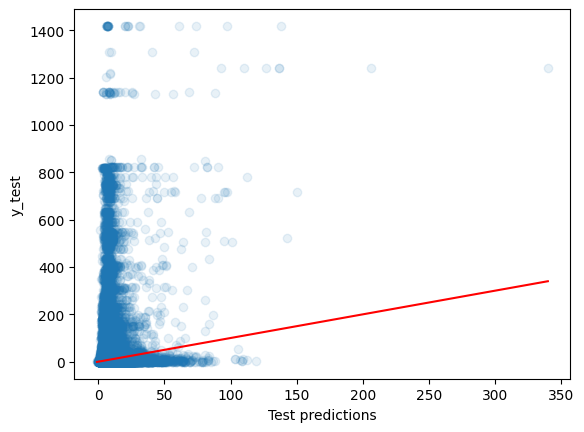

In [14]:
plt.scatter(test_predictions, y_test,alpha=0.1)
plt.plot([min(test_predictions), max(test_predictions)], [min(test_predictions), max(test_predictions)], color='red')
plt.xlabel("Test predictions")
plt.ylabel("y_test")
plt.show()